In [17]:
import os
os.environ["OMP_NUM_THREADS"] = "1"
os.environ["OPENBLAS_NUM_THREADS"] = "1"
os.environ["MKL_NUM_THREADS"] = "1"
os.environ["VECLIB_MAXIMUM_THREADS"] = "1"
os.environ["NUMEXPR_NUM_THREADS"] = "1"

resonant_type = 'nonres'
status = 'int'
channel = 'bbll,bbbb,bbtautau,bbyy,ml'
channels = channel.split(',')

channel_label_map = {
    'bbbb': r"$\mathit{b\bar{b}b\bar{b}}$",
    'bbtautau': r"$\mathit{b\bar{b}\tau^+\tau^-}$",
    'bbyy': r"$\mathit{b\bar{b}\gamma\gamma}$",
    'bbll': r"$\mathit{b\bar{b}ll}$",
    'ml': r"Multi-leptons",
    'combined': r"Combined",
}
channel_text = {
    'combined': r'$\mathit{HH\rightarrow b\bar{b}\tau^+\tau^- + b\bar{b}\gamma\gamma + b\bar{b}b\bar{b}}$',
    'bbbb': r'$\mathit{HH\rightarrow b\bar{b}b\bar{b}}$',
    'bbyy': r'$\mathit{HH\rightarrow b\bar{b}\gamma\gamma}$',
    'bbll': r'$\mathit{HH\rightarrow b\bar{b}ll}$',
    'ml': r'$\mathit{HH\rightarrow multi-leptons$',
    'bbtautau': r'$\mathit{HH\rightarrow b\bar{b}\tau^+\tau^-}$',
}
input_dir = "/nfs/dust/atlas/user/caiyi/HH_comb/hh_combination_fw/input_ws/20240120"

# Standard model

In [18]:
output_dir = "/nfs/dust/atlas/user/caiyi/HH_comb/hh_combination_fw/run_atlas_0120/output_xsec"
config = "/nfs/dust/atlas/user/caiyi/HH_comb/hh_combination_fw/run_atlas_0120/option_xsec.yaml"
scheme = "/nfs/dust/atlas/user/caiyi/HH_comb/hh_combination_fw/run_atlas_0120/nonres_xsec.json"

## Step-1 Process channels

In [19]:
import os
cmd = f"HHComb process_channels -i {input_dir} -c {channel} -n nonres --file_expr '<mX[F]>' -o {output_dir} --config {config} --unblind --tasks modification,limit"
print(cmd)
# os.system(cmd)

HHComb process_channels -i /nfs/dust/atlas/user/caiyi/HH_comb/hh_combination_fw/input_ws/20240120 -c bbll,bbbb,bbtautau,bbyy,ml -n nonres --file_expr '<mX[F]>' -o /nfs/dust/atlas/user/caiyi/HH_comb/hh_combination_fw/run_atlas_0120/output_xsec --config /nfs/dust/atlas/user/caiyi/HH_comb/hh_combination_fw/run_atlas_0120/option_xsec.yaml --unblind --tasks modification,limit


## Step-2 Combine channels


### Correlate

In [20]:
import os
cmd = f"HHComb combine_channels -i {output_dir} -c {channel} -s {scheme} -n nonres --file_expr '<mX[F]>' --config {config} --unblind --tasks combination,limit"
print(cmd)
# os.system(cmd)

HHComb combine_channels -i /nfs/dust/atlas/user/caiyi/HH_comb/hh_combination_fw/run_atlas_0120/output_xsec -c bbll,bbbb,bbtautau,bbyy,ml -s /nfs/dust/atlas/user/caiyi/HH_comb/hh_combination_fw/run_atlas_0120/nonres_xsec.json -n nonres --file_expr '<mX[F]>' --config /nfs/dust/atlas/user/caiyi/HH_comb/hh_combination_fw/run_atlas_0120/option_xsec.yaml --unblind --tasks combination,limit


### Un-correlate

In [21]:
import os
cmd = f"HHComb combine_channels -i {output_dir} -c {channel} -n nonres --file_expr '<mX[F]>' --config {config} --unblind --tasks combination,limit"
print(cmd)
# os.system(cmd)

HHComb combine_channels -i /nfs/dust/atlas/user/caiyi/HH_comb/hh_combination_fw/run_atlas_0120/output_xsec -c bbll,bbbb,bbtautau,bbyy,ml -n nonres --file_expr '<mX[F]>' --config /nfs/dust/atlas/user/caiyi/HH_comb/hh_combination_fw/run_atlas_0120/option_xsec.yaml --unblind --tasks combination,limit


## Step-3 Plot

<Figure size 432x288 with 0 Axes>

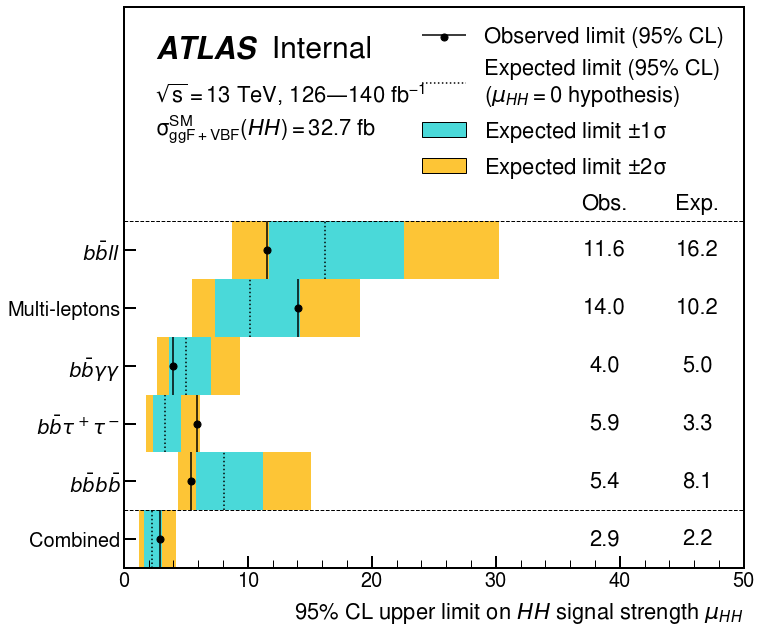

Save to /nfs/dust/atlas/user/caiyi/HH_comb/hh_combination_fw/run_atlas_0120/output_xsec/figures/int/limit/limit_mu.pdf


/nfs/dust/atlas/user/caiyi/HH_comb/hh_combination_fw/submodules/quickstats/quickstats/plots/upper_limit_1D_plot.py:197: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_xlim(xlim[0] - (xlim[1]/0.7 - xlim[1])*0.5, xlim[1]/0.7)
/tmp/ipykernel_12556/253591874.py:103: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([1,2,5,10,20,50, 100, 200, 500, 1000, 2000])


<Figure size 432x288 with 0 Axes>

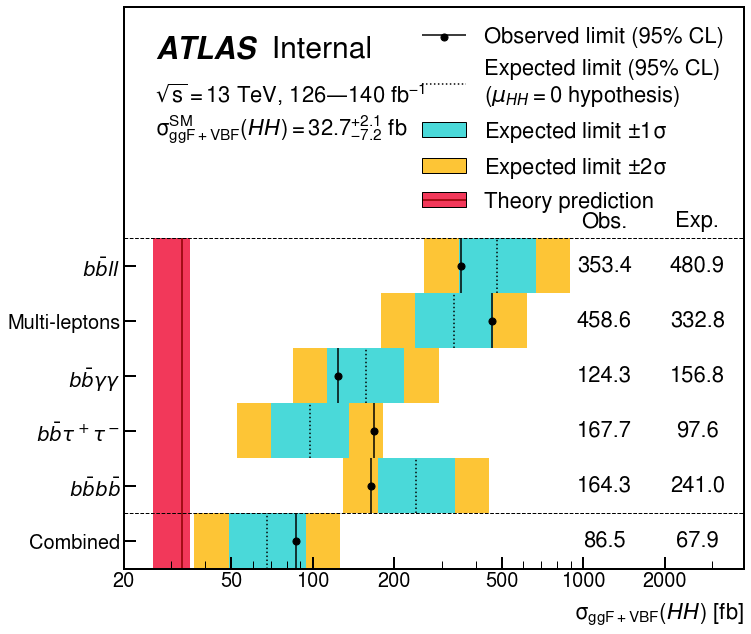

Save to /nfs/dust/atlas/user/caiyi/HH_comb/hh_combination_fw/run_atlas_0120/output_xsec/figures/int/limit/limit_xsec.pdf


In [22]:
import os
import json
from quickstats.plots import UpperLimit1DPlot
from matplotlib.ticker import LogLocator
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
def SM_error(ggf_cv, ggf_up, ggf_dn, vbf_cv, vbf_up, vbf_dn):
    up = 1 + np.sqrt(ggf_cv*ggf_cv*ggf_up*ggf_up + vbf_cv*vbf_cv*vbf_up*vbf_up) / (ggf_cv + vbf_cv)
    dn = 1 - np.sqrt(ggf_cv*ggf_cv*ggf_dn*ggf_dn + vbf_cv*vbf_cv*vbf_dn*vbf_dn) / (ggf_cv + vbf_cv)
    return up, dn

def remove_list(data):
    for k, v in data.items():
        for p,v_ in v.items():
            data[k][p] = v_[0]
    return data

plotdir = output_dir+'/figures/'
if not os.path.exists(plotdir):
    os.makedirs(plotdir)
# combine_tags = ['bbbb_bbll_bbtautau_bbyy_ml-nocorr','bbbb_bbll_bbtautau_bbyy_ml-fullcorr']
combine_tags = ['bbbb_bbll_bbtautau_bbyy_ml-fullcorr']

labels = {
    'expected': 'Expected limit (95% CL)\n'+r'($\mathit{\mu_{HH}} = 0$ hypothesis)',
    'observed': 'Observed limit (95% CL)'
}
plotting_order = ['combined', 'bbbb', 'bbtautau', 'bbyy', 'ml', 'bbll']
# plotting_order = ['bbbb', 'bbtautau', 'bbyy', 'bbll'] # To blind multi-leptons
default_analysis_label_options = {'loc': (0.05, 0.95),
                                  'fontsize':30, 'energy': '13 TeV', 
                                  'lumi': '126—140 fb$^{-1}$',
                                  'status': status,
                                  'extra_text': r'$\sigma_{ggF+VBF}^{SM} (\mathit{HH})=32.7_{-7.2}^{+2.1}$ fb'}
styles = {
    'axis':{
        'tick_bothsides': False,
        'major_length': 12,
        },
    'legend':{
        'loc': 'upper right',
        },
}
configs = {
    'top_margin': 3.7,
}

def get_limit_data(scenario='nominal'):
    scale_factor = 1
    sm_limit_df = {}
    data = {}
    for c in channels + ['combined']:
        limit_path = os.path.join(output_dir, 'limit', resonant_type, c, combine_tag if c == 'combined' else '', scenario, 'limits_xsec_br.json')
        if not os.path.exists(limit_path):
            print(limit_path, 'not found')
            continue
        data[c] = json.load(open(limit_path))
    data_dict = remove_list(data)
    sm_limit_df = pd.DataFrame(data_dict) * scale_factor
    return sm_limit_df

def plot_limit_mu(sm_limit_df,suffix):
    filtered_order = [col for col in plotting_order if col in sm_limit_df.columns]
    sm_limit_df = sm_limit_df[filtered_order]
    default_analysis_label_options['extra_text'] = r'$\sigma_{ggF+VBF}^{SM} (\mathit{HH})=32.7$ fb'

    plotter = UpperLimit1DPlot(sm_limit_df, channel_label_map, line_below=["bbbb"], labels=labels,
                               analysis_label_options=default_analysis_label_options, styles=styles, config=configs)
    xlabel = r"95% CL upper limit on $\mathit{HH}$ signal strength $\mathit{\mu_{HH}}$"
    ax = plotter.draw(logx=False, xlabel=xlabel, draw_observed=True, draw_stat=False, sig_fig=1, add_text=True)
    ax.set_xlim([0, 50])
    os.makedirs(os.path.join(plotdir, f'{status}/limit'), exist_ok=True)
    filename = os.path.join(plotdir, f'{status}/limit', f"limit_mu{suffix}.pdf")
    plt.savefig(filename, bbox_inches="tight")
    plt.show()
    print('Save to', filename)
    sm_limit_df.to_csv(filename.replace('.pdf', '.csv'))


def plot_limit_xsec(sm_limit_df,suffix=''):
    total_cross = 32.743
    sm_limit_df *= total_cross
    xerrhi, xerrlo = SM_error(ggf_cv=31.02, ggf_up=np.sqrt(np.square(0.03)+np.square(0.06)), ggf_dn=np.sqrt(np.square(0.03)+np.square(0.23)), vbf_cv=1.723, vbf_up=np.sqrt(np.square(0.0003)+np.square(0.021)), vbf_dn=np.sqrt(np.square(0.0004)+np.square(0.021)))
    xerrhi, xerrlo = xerrhi * total_cross, xerrlo * total_cross
    filtered_order = [col for col in plotting_order if col in sm_limit_df.columns]
    sm_limit_df = sm_limit_df[filtered_order]
    default_analysis_label_options['extra_text'] = r'$\sigma_{ggF+VBF}^{SM} (\mathit{HH})=32.7_{-7.2}^{+2.1}$ fb'
    styles['xtick'] = {
        'format': 'numeric',
        'steps':[1, 2, 3, 4, 5],
    }
    configs['top_margin'] = 4.2

    plotter = UpperLimit1DPlot(sm_limit_df, channel_label_map, line_below=["bbbb"], labels=labels,
                               analysis_label_options=default_analysis_label_options, styles=styles, config=configs)
    plotter.add_curve(x=total_cross, xerrlo=xerrlo, xerrhi=xerrhi, label="Theory prediction")
    xlabel = r"$\sigma_{ggF+VBF}(\mathit{HH})$ [fb]"
    ax = plotter.draw(logx=True, xlabel=xlabel, draw_observed=True, draw_stat=False, sig_fig=1, add_text=True)
    ax.set_xlim([20, 120*total_cross])
    ax.xaxis.set_major_locator(LogLocator(base=10, subs=(1,2,5)))
    ax.set_xticklabels([1,2,5,10,20,50, 100, 200, 500, 1000, 2000])
    os.makedirs(os.path.join(plotdir, f'{status}/limit'), exist_ok=True)
    filename = os.path.join(plotdir, f'{status}/limit', f"limit_xsec{suffix}.pdf")
    plt.savefig(filename, bbox_inches="tight")
    plt.show()
    print('Save to', filename)
    sm_limit_df.to_csv(filename.replace('.pdf', '.csv'))

for combine_tag in combine_tags:
    suffix = ''
    if 'nocorr' in combine_tag:
        suffix = '_nocorr'
    sm_limit_df = get_limit_data()
    plot_limit_mu(sm_limit_df,suffix)
    sm_limit_df_xsec = get_limit_data('xsec')
    plot_limit_xsec(sm_limit_df_xsec,suffix)


# $\kappa_\lambda$, $\kappa_{2V}$

In [23]:
output_dir_kl = "/nfs/dust/atlas/user/caiyi/HH_comb/hh_combination_fw/run_atlas_0120/output_kl"
config_kl = "/nfs/dust/atlas/user/caiyi/HH_comb/hh_combination_fw/run_atlas_0120/option_kl.yaml"
output_dir_k2v = "/nfs/dust/atlas/user/caiyi/HH_comb/hh_combination_fw/run_atlas_0120/output_k2v"
config_k2v = "/nfs/dust/atlas/user/caiyi/HH_comb/hh_combination_fw/run_atlas_0120/option_k2v.yaml"
scheme_kl = "/nfs/dust/atlas/user/caiyi/HH_comb/hh_combination_fw/run_atlas_0120/nonres_kl.json"
scheme_k2v = "/nfs/dust/atlas/user/caiyi/HH_comb/hh_combination_fw/run_atlas_0120/nonres_k2v.json"

## Step-1 Process channels & Combine channels

In [24]:
import os
channel='bbll,bbtautau,bbbb,bbyy'
cmd = f"""
HHComb process_channels -i {input_dir} -c {channel} -n nonres --file_expr '<mX[F]>_kl' -o {output_dir_kl} --config {config_kl} --unblind --tasks modification,likelihood
HHComb combine_channels -i {output_dir_kl} -c {channel} -n nonres --file_expr '<mX[F]>_kl' --config {config_kl} -s {scheme_kl} --unblind --task combination,likelihood
HHComb combine_channels -i {output_dir_kl} -c {channel} -n nonres --file_expr '<mX[F]>_kl' --config {config_kl} --unblind --task combination,likelihood
"""
print(cmd)
# os.system(cmd)
cmd = f"""HHComb process_channels -i {input_dir} -c {channel} -n nonres --file_expr '<mX[F]>_k2V' -o {output_dir_k2v} --config {config_k2v} --unblind --tasks modification,likelihood
HHComb combine_channels -i {output_dir_k2v} -c {channel} -n nonres --file_expr '<mX[F]>_k2V' --config {config_k2v} -s {scheme_k2v} --unblind --tasks combination,likelihood
HHComb combine_channels -i {output_dir_k2v} -c {channel} -n nonres --file_expr '<mX[F]>_k2V' --config {config_k2v} --unblind --tasks combination,likelihood
"""
print(cmd)
# os.system(cmd)


HHComb process_channels -i /nfs/dust/atlas/user/caiyi/HH_comb/hh_combination_fw/input_ws/20240120 -c bbll,bbtautau,bbbb,bbyy -n nonres --file_expr '<mX[F]>_kl' -o /nfs/dust/atlas/user/caiyi/HH_comb/hh_combination_fw/run_atlas_0120/output_kl --config /nfs/dust/atlas/user/caiyi/HH_comb/hh_combination_fw/run_atlas_0120/option_kl.yaml --unblind --tasks modification,likelihood
HHComb combine_channels -i /nfs/dust/atlas/user/caiyi/HH_comb/hh_combination_fw/run_atlas_0120/output_kl -c bbll,bbtautau,bbbb,bbyy -n nonres --file_expr '<mX[F]>_kl' --config /nfs/dust/atlas/user/caiyi/HH_comb/hh_combination_fw/run_atlas_0120/option_kl.yaml -s /nfs/dust/atlas/user/caiyi/HH_comb/hh_combination_fw/run_atlas_0120/nonres_kl.json --unblind --task combination,likelihood
HHComb combine_channels -i /nfs/dust/atlas/user/caiyi/HH_comb/hh_combination_fw/run_atlas_0120/output_kl -c bbll,bbtautau,bbbb,bbyy -n nonres --file_expr '<mX[F]>_kl' --config /nfs/dust/atlas/user/caiyi/HH_comb/hh_combination_fw/run_atlas_

## Step-2 Plot likelihood

klambda_expected bbll 68%: [-5.6324 12.2992] 95%: [-8.8084 16.0003]
klambda_expected bbtautau 68%: [-1.0284  7.6272] 95%: [-2.5334  9.2299]
klambda_expected bbbb 68%: [-2.7656  8.9065] 95%: [-5.1354 11.2426]
klambda_expected bbyy 68%: [-1.1911  6.0827] 95%: [-2.8244  7.802 ]


<Figure size 432x288 with 0 Axes>

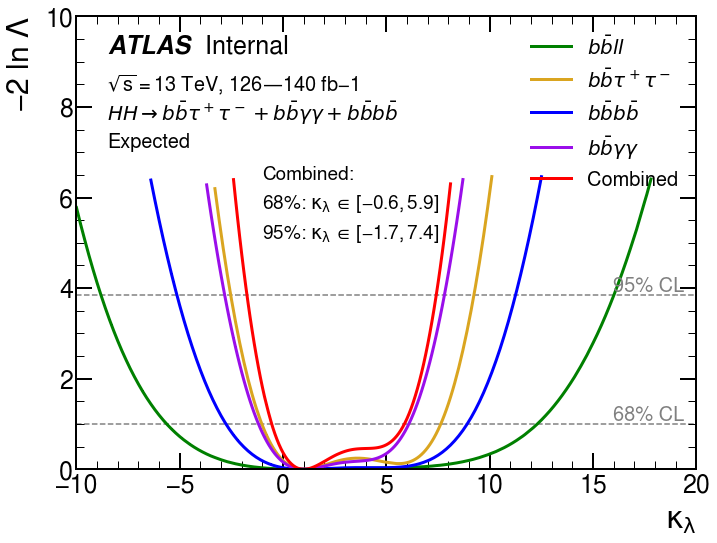

Save /nfs/dust/atlas/user/caiyi/HH_comb/hh_combination_fw/run_atlas_0120/output_kl/figures//int/likelihood_scan/klambda_expected_int.pdf
klambda_observed bbll 68%: [-2.2097  9.0468] 95%: [-6.1752 13.2757]
klambda_observed bbtautau 68%: [-1.7536  3.2239] 95%: [-3.1904  9.0988]
klambda_observed bbbb 68%: [0.9509 9.0641] 95%: [-3.345  11.1934]
klambda_observed bbyy 68%: [0.5375 5.2408] 95%: [-1.4407  6.9179]


<Figure size 432x288 with 0 Axes>

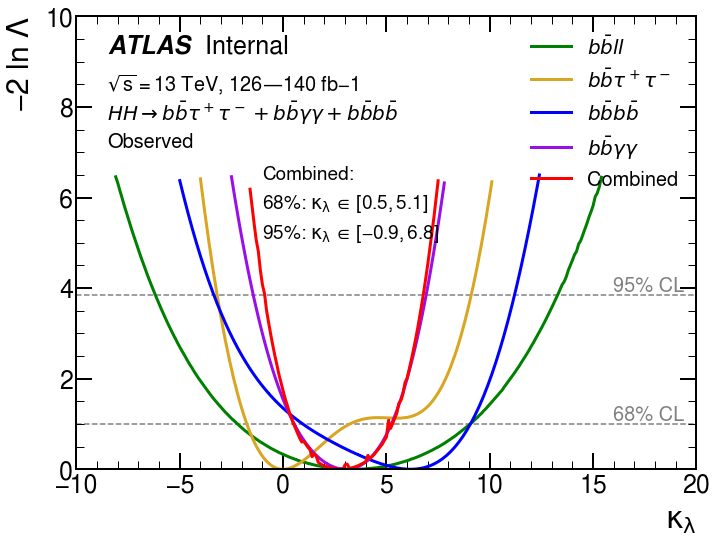

Save /nfs/dust/atlas/user/caiyi/HH_comb/hh_combination_fw/run_atlas_0120/output_kl/figures//int/likelihood_scan/klambda_observed_int.pdf
k2v_expected bbll 68%: [0.0552 2.1169] 95%: [-0.4717  2.643 ]
k2v_expected bbtautau 68%: [0.1724 2.0034] 95%: [-0.2421  2.4161]
k2v_expected bbbb 68%: [0.2974 1.7699] 95%: [-0.0473  2.1225]
k2v_expected bbyy 68%: [-0.3289  2.5285] 95%: [-1.1061  3.3075]


<Figure size 432x288 with 0 Axes>

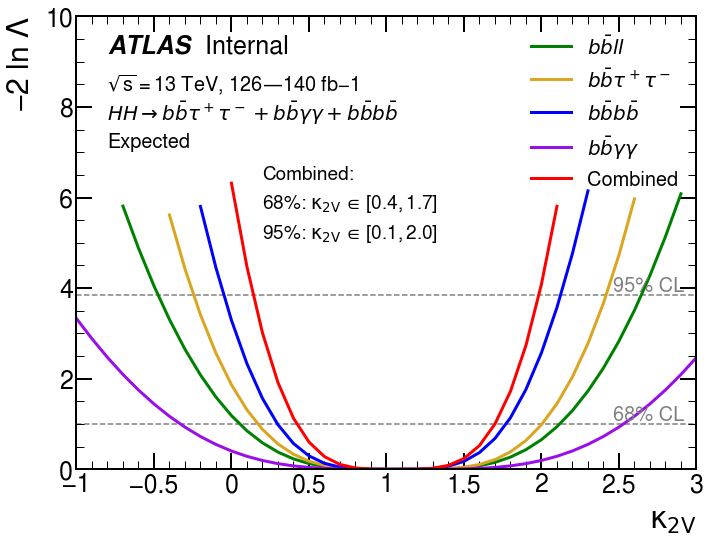

Save /nfs/dust/atlas/user/caiyi/HH_comb/hh_combination_fw/run_atlas_0120/output_k2v/figures//int/likelihood_scan/k2v_expected_int.pdf
k2v_observed bbll 68%: [0.3681 1.7855] 95%: [-0.1802  2.3375]
k2v_observed bbtautau 68%: [-0.1501  2.3126] 95%: [-0.528   2.6949]
k2v_observed bbbb 68%: [0.3517 1.7155] 95%: [-0.0255  2.1029]
k2v_observed bbyy 68%: [0.2727 1.9274] 95%: [-0.4763  2.6775]


<Figure size 432x288 with 0 Axes>

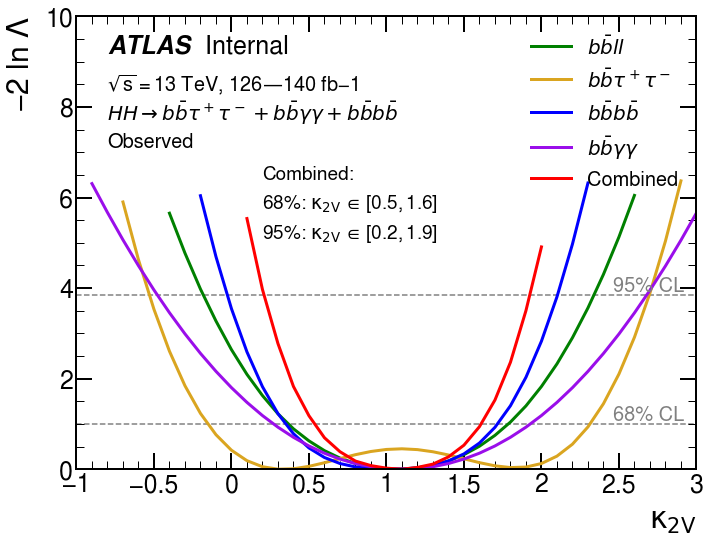

Save /nfs/dust/atlas/user/caiyi/HH_comb/hh_combination_fw/run_atlas_0120/output_k2v/figures//int/likelihood_scan/k2v_observed_int.pdf


In [25]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from quickstats.maths.interpolation import get_intervals
from quickstats.plots import Likelihood1DPlot
from quickstats.plots.color_schemes import QUICKSTATS_PALETTES
from scipy.interpolate import interp1d

plotdir_kl = output_dir_kl+'/figures/'
plotdir_k2v = output_dir_k2v+'/figures/'
# combinetags = ['bbbb_bbll_bbtautau_bbyy-nocorr','bbbb_bbll_bbtautau_bbyy-fullcorr']
combinetags = ['bbbb_bbll_bbtautau_bbyy-fullcorr']

styles_map = {
    'bbll': {"color": "g", "marker": ","},
    'bbtautau': {"color": "#DAA520", "marker": ","},
    'bbbb': {"color": 'b', "marker": ","},
    'bbyy': {"color": "#9A0EEA", "marker": ","},
    'combined': {"color": "r", "marker": ","},
}
channels = ['bbll', 'bbtautau', 'bbbb', 'bbyy']

styles = {
    'legend': {
        'loc': 'upper right'
    },
    'plot': {
        'linewidth': 3,
    },
    'axis': {
        'labelsize': 25,
    },
    'xlabel': {
        'fontsize': 30,
    },
    'ylabel': {
        'fontsize': 30,
    }
}
anno_op = {
    'x': 0.3,
    'y': 0.64,
    'dy': 0.065,
    'font_size': 19
}
label_options = {
    'status': status,
    'loc': (0.05, 0.96),
    'fontsize': 25, # ATLAS
    'energy': '13 TeV',
    'lumi': r'126—140 fb${-1}$',
}

def get_interval(df, level):
    xvalues = df['klambda'].to_numpy()
    yvalues = df['qmu'].to_numpy()
    func_theory = interp1d(xvalues, yvalues)
    x_new = np.arange(min(xvalues), max(xvalues), 0.0001)
    y_new = func_theory(x_new)
    asign = np.sign(y_new-level)
    signchange = ((np.roll(asign, 1) - asign) != 0).astype(int)
    intersections = x_new[signchange==1]
    return intersections

def get_likelihood_data(variable, outdir, scenario='nominal'):
    data = {}
    filename = 'likelihoods_' + variable + '.json'
    for c in channels + ['combined']:
        likelihood_path = os.path.join(outdir+suffix, 'likelihood', resonant_type, c, combine_tag if c=='combined' else '', scenario, filename)
        if not os.path.exists(likelihood_path):
            print(likelihood_path, 'not exist')
            continue
        data[c] = json.load(open(likelihood_path))
    return data

def data_loading_lh(scenario, variable, outdir, cut=1000):
    likelihood_df, uncond_df = {}, {}
    data = get_likelihood_data(variable, outdir, scenario)
    for c in data:
        df = pd.DataFrame(data[c]).dropna(axis=1, how='all')
        df_uncond = df.drop(index=df.index[1:], axis=0, inplace=False)
        df_scan = df.drop(index=df.index[0], axis=0, inplace=False)
        df_scan = df_scan.drop(df_scan[df_scan['qmu']>cut].index)
        likelihood_df[c] = df_scan
        uncond_df[c] = df_uncond
    return likelihood_df, uncond_df

def plot(likelihood_df, variable, obs, plotdir, xmin = -15, xmax = 20, ymin=0, ymax = 12, xlabel=r"$\mathrm{\kappa_{\lambda}}$", xattrib='klambda', yattrib='qmu', status='int'):
    dic = {}
    options = {}
    config = {
        'sigma_values': (1, 3.84),
        'sigma_levels': ('1sigma', '0.95'),
        'sigma_names': ('68%', '95%'),
        'sigma_pos': 0.89,
     }
    options['ylabel'] = r"$-2\ ln\ \Lambda$"
    text = "Observed" if obs == 'observed' else "Expected"
    label_options['extra_text'] = channel_text['combined'] + f"//{text}"
    
    df_index = f'{variable}_{obs}'
    if len(likelihood_df[df_index])==0:
        return
    plotter = Likelihood1DPlot(likelihood_df[df_index], label_map=channel_label_map, styles_map=styles_map,
                            styles=styles, analysis_label_options=label_options,
                              config = config)
    ax = plotter.draw(xlabel=xlabel, ymin=ymin, ymax=ymax, xmin=xmin, xmax=xmax, xattrib=xattrib, yattrib=yattrib, interval_format='68_95', **options)

    if 'combined' in likelihood_df[df_index] and yattrib=='qmu':
        dic['combined'] = {}
        intersections_1 = get_intervals(likelihood_df[df_index]['combined'][variable].values, likelihood_df[df_index]['combined']['qmu'].values, level=config['sigma_values'][0], delta=0.0001)[0]
        intersections_2 = get_intervals(likelihood_df[df_index]['combined'][variable].values, likelihood_df[df_index]['combined']['qmu'].values, level=config['sigma_values'][1], delta=0.0001)[0]
        dic['combined'][f"{config['sigma_values'][0]} low"] = intersections_1[0]
        dic['combined'][f"{config['sigma_values'][0]} high"] = intersections_1[1]
        dic['combined'][f"{config['sigma_values'][1]} low"] = intersections_2[0]
        dic['combined'][f"{config['sigma_values'][1]} high"] = intersections_2[1]

        ax.annotate(r'Combined:', 
                    (anno_op['x'], anno_op['y']), xycoords = 'axes fraction', fontsize = anno_op['font_size'])
        ax.annotate(r'$68\%$: '+xlabel+r'$ \in [%.1f, %.1f]$' %(intersections_1[0], intersections_1[1]), 
                    (anno_op['x'], anno_op['y'] - anno_op['dy']), xycoords = 'axes fraction', fontsize = anno_op['font_size'])
        ax.annotate(r'$95\%$: '+xlabel+r'$ \in [%.1f, %.1f]$' %(intersections_2[0], intersections_2[1]), 
                    (anno_op['x'], anno_op['y'] - 2 * anno_op['dy']), xycoords = 'axes fraction', fontsize = anno_op['font_size'])


    for c in channels:
        if c not in dic:
            dic[c] = {}
        try:
            intersections_1 = get_intervals(likelihood_df[df_index][c][variable].values, likelihood_df[df_index][c]['qmu'].values, level=config['sigma_values'][0], delta=0.0001)[0]
            intersections_2 = get_intervals(likelihood_df[df_index][c][variable].values, likelihood_df[df_index][c]['qmu'].values, level=config['sigma_values'][1], delta=0.0001)[0]
            dic[c][f"{config['sigma_values'][0]} low"] = intersections_1[0]
            dic[c][f"{config['sigma_values'][0]} high"] = intersections_1[1]
            dic[c][f"{config['sigma_values'][1]} low"] = intersections_2[0]
            dic[c][f"{config['sigma_values'][1]} high"] = intersections_2[1]
            print(df_index, c, '68%:', intersections_1, '95%:', intersections_2)
        except:
            print('Failed to get interval for', df_index, c)
            continue
        
    savefolder = plotdir + f'/{status}/likelihood_scan/'
    os.makedirs(savefolder, exist_ok=True)
    suffix=''
    if 'nocorr' in combine_tag: suffix='_nocorr'
    filename = savefolder+f"{df_index}_{status}{suffix}.pdf"
    plt.savefig(filename, bbox_inches="tight")
    plt.show()
    print('Save', filename)
    dic = json.dumps(dic, indent=4, separators=(',', ': '))
    with open(filename.replace('.pdf','.json'), 'w') as json_file:
        json_file.write(dic)


def kappa_name(variable):
    name_map = {
        'klambda': r"$\mathrm{\kappa_{\lambda}}$",
        'k2v': r"$\mathrm{\kappa_{2V}}$"
    }
    xrange = {
        'klambda': (-10, 20),
        'k2v': (-1, 3)
    }
    yrange = {
        'klambda':  (0, 10),
        'k2v': (0, 10)
    }
    xattrib = {
        'klambda': 'klambda',
        'k2v': 'k2v'
    }
    return name_map[variable], xattrib[variable], xrange[variable], yrange[variable]

variables = ['klambda', 'k2v']
obs = ['expected', 'observed']

for combine_tag in combinetags:
    likelihood_df, uncond_df = {}, {}
    for o in obs:
        for variable in variables:
            try:
                likelihood_df[f'{variable}_{o}'], uncond_df[f'{variable}_{o}'] = data_loading_lh('nominal' if o=='observed' else o, variable, output_dir_kl if variable=='klambda' else output_dir_k2v, cut=6.5)
            except:
                print(o, variable)
                continue

    for variable in variables:
        for o in obs:
            xlabel, xattrib, xrange, yrange = kappa_name(variable)
            if variable=='klambda':
                plotdir = plotdir_kl
            else:
                plotdir = plotdir_k2v
            df = plot(likelihood_df, variable, o, plotdir, xlabel=xlabel, xattrib=xattrib, xmin = xrange[0], xmax = xrange[1], ymin=yrange[0], ymax = yrange[1], status=status)